In [1]:
# load packages
import pandas as pd
import numpy as np
import networkx as nx
# import packages to set up bipartite graph
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import random
import movecolumn as mc
from scipy import stats
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nodes_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/edges.csv'
edges_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/hero-network.csv'
network_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%202/Resources/nodes.csv' 

# extract data
nodes_raw = pd.read_csv(nodes_url)
edges_raw = pd.read_csv(edges_url)
network_raw = pd.read_csv(network_url)

In [3]:
nodes_raw

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
edges_raw

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
network_raw

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [7]:
nodes_profile = ProfileReport(nodes_raw, title="Nodes Profiling Report")

In [8]:
nodes_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
edges_profile = ProfileReport(edges_raw, title="Edges Profiling Report")

In [13]:
edges_profile

In [10]:
network_profile = ProfileReport(network_raw, title="Network Profiling Report")

In [12]:
network_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
Thor = edges_raw[edges_raw['hero1']=='THOR/DR. DONALD BLAK'].sample(25)
Cap = Subset = edges_raw[edges_raw['hero1']=='CAPTAIN AMERICA'].sample(25)
IronMan = edges_raw[edges_raw['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)

In [22]:
Subset = pd.concat([Thor,Cap,IronMan],axis = 0)

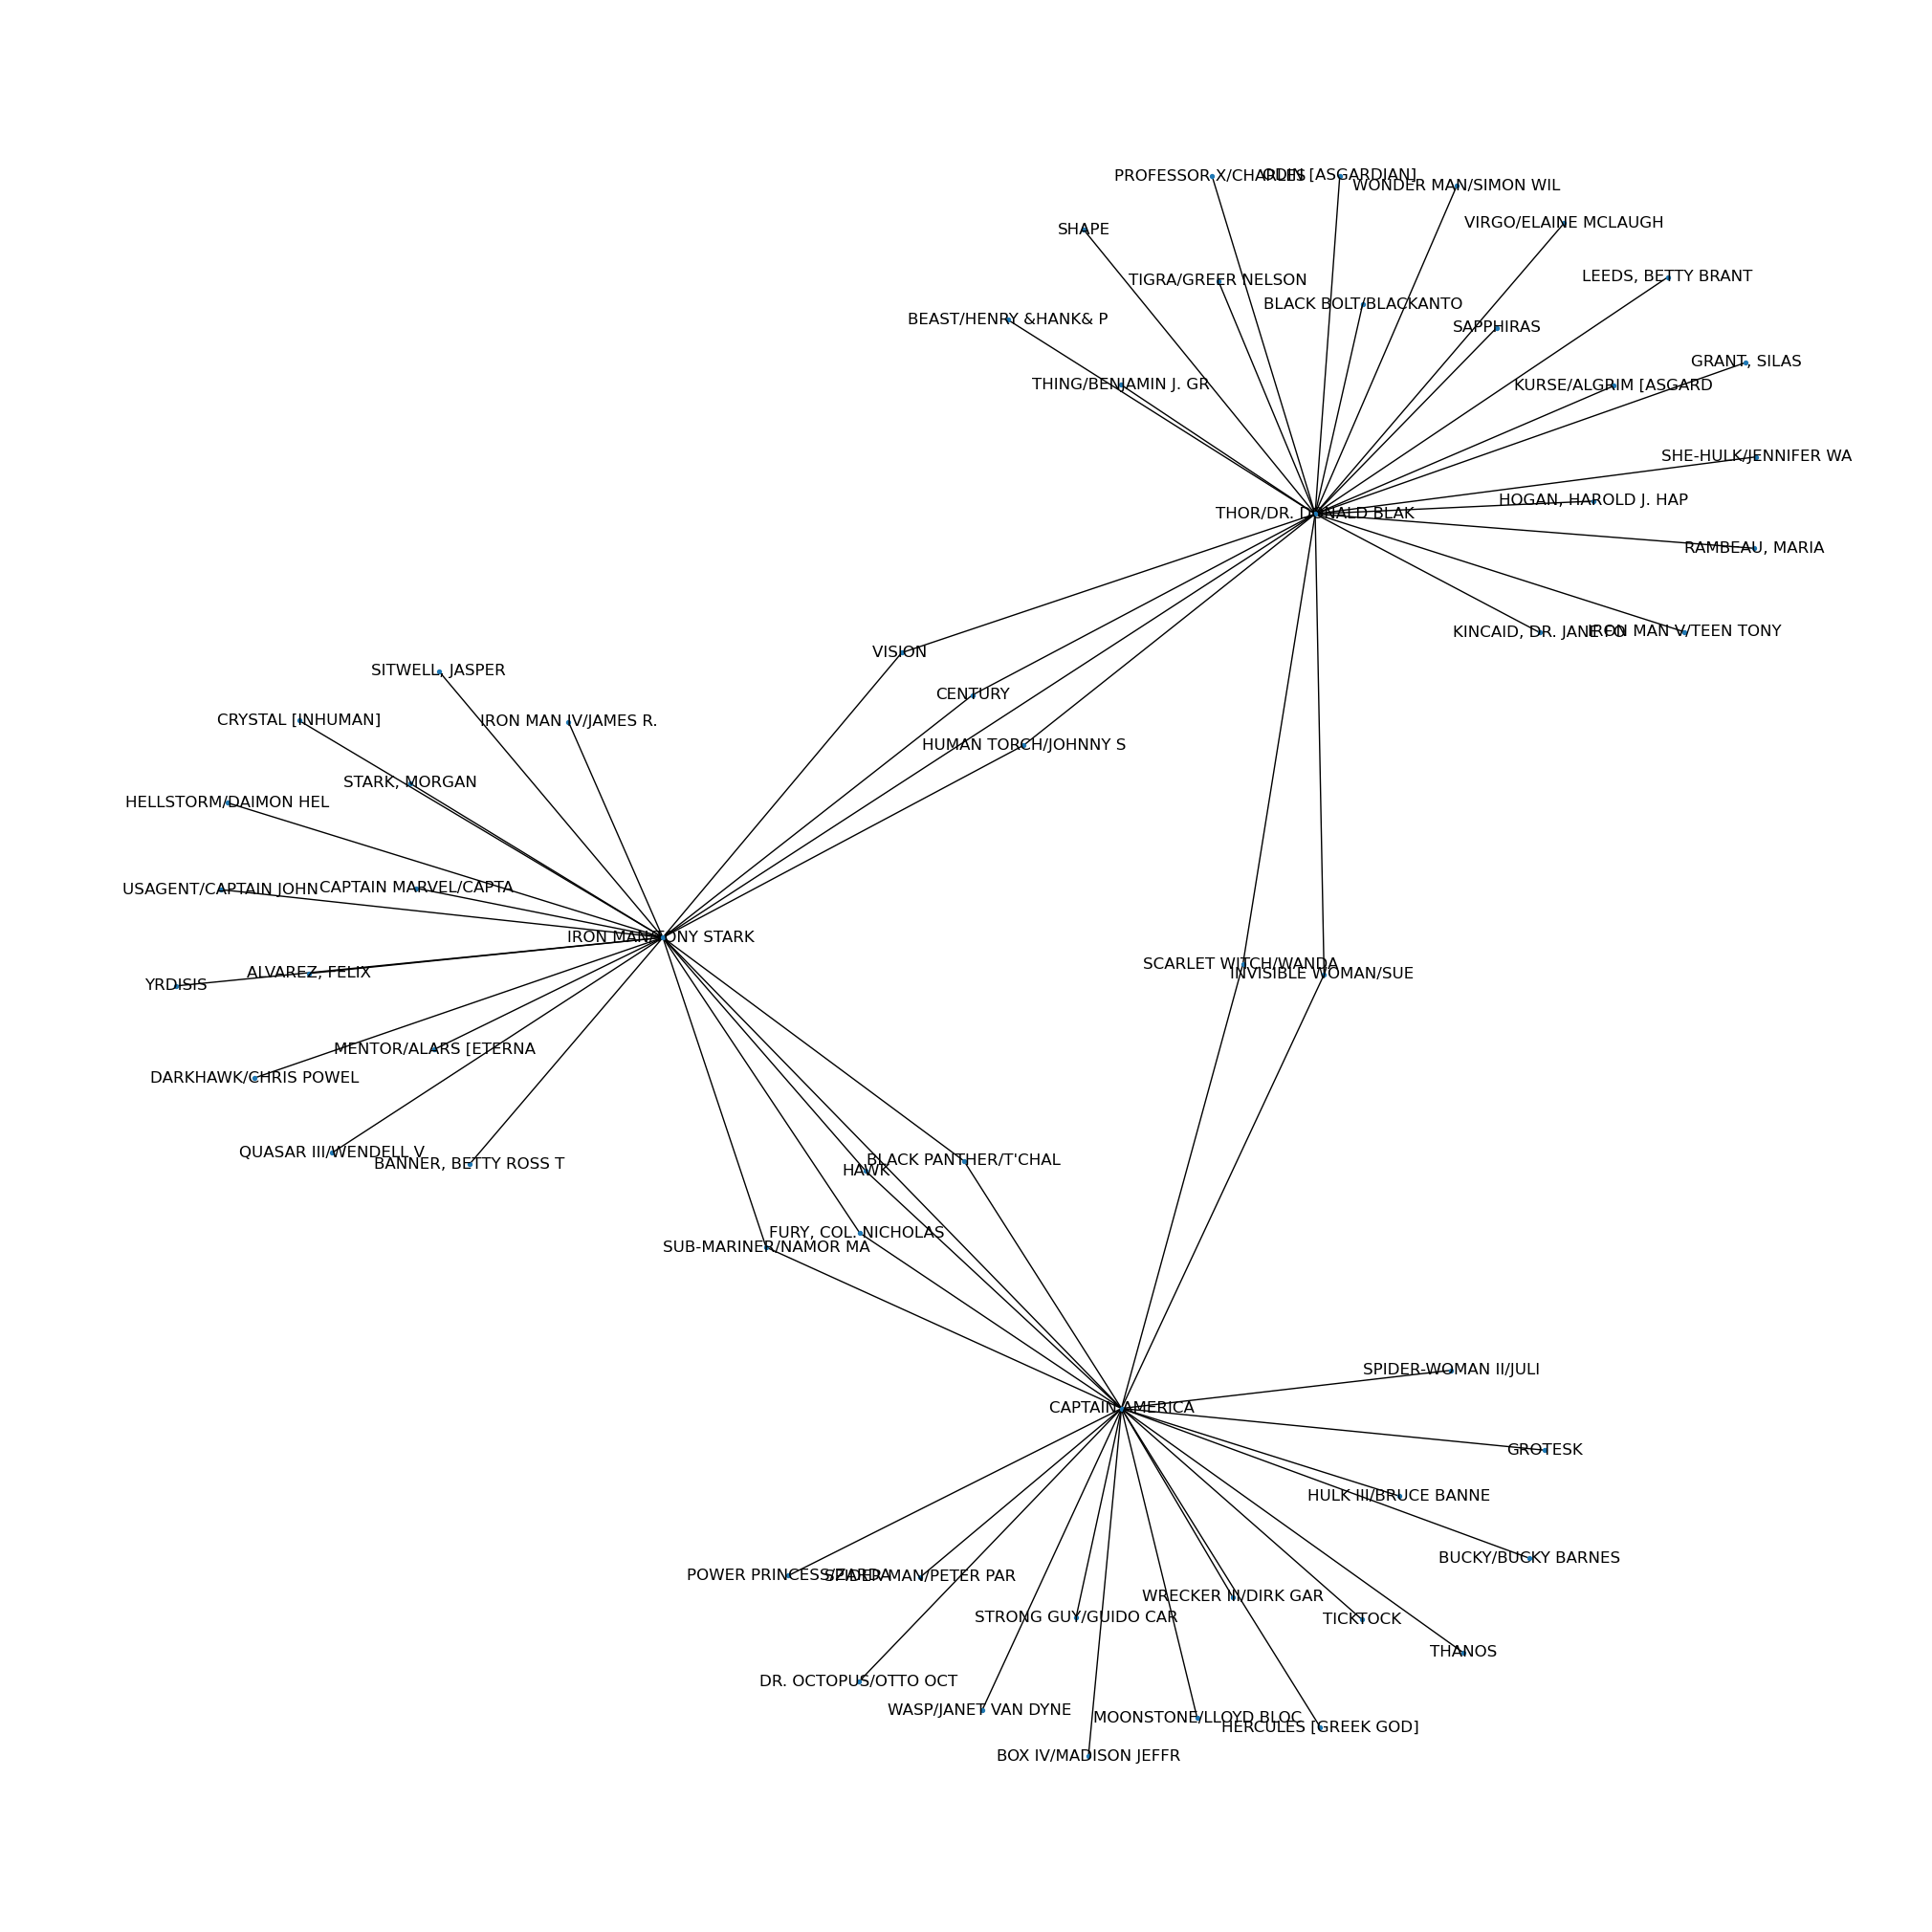

In [23]:
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [24]:
list(G.neighbors('CAPTAIN AMERICA'))

['FURY, COL. NICHOLAS ',
 'HERCULES [GREEK GOD]',
 'BOX IV/MADISON JEFFR',
 'STRONG GUY/GUIDO CAR',
 'INVISIBLE WOMAN/SUE ',
 "BLACK PANTHER/T'CHAL",
 'THANOS',
 'SCARLET WITCH/WANDA ',
 'HAWK',
 'WRECKER III/DIRK GAR',
 'TICKTOCK',
 'MOONSTONE/LLOYD BLOC',
 'BUCKY/BUCKY BARNES',
 'SPIDER-WOMAN II/JULI',
 'SUB-MARINER/NAMOR MA',
 'SPIDER-MAN/PETER PAR',
 'WASP/JANET VAN DYNE ',
 'DR. OCTOPUS/OTTO OCT',
 'IRON MAN/TONY STARK ',
 'HULK III/BRUCE BANNE',
 'POWER PRINCESS/ZARDA',
 'GROTESK']

In [25]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
[str(x) + '----' + str(y) for x,y in zip(G.nodes(),degrees)]

['THOR/DR. DONALD BLAK----24',
 'RAMBEAU, MARIA----1',
 'LEEDS, BETTY BRANT----1',
 'GRANT, SILAS----1',
 'ODIN [ASGARDIAN]----1',
 'IRON MAN V/TEEN TONY----1',
 'VISION ----2',
 'KURSE/ALGRIM [ASGARD----1',
 'SCARLET WITCH/WANDA ----2',
 'VIRGO/ELAINE MCLAUGH----1',
 'SHAPE----1',
 'THING/BENJAMIN J. GR----1',
 'TIGRA/GREER NELSON----1',
 'HOGAN, HAROLD J. HAP----1',
 'KINCAID, DR. JANE FO----1',
 'INVISIBLE WOMAN/SUE ----2',
 'SHE-HULK/JENNIFER WA----1',
 'HUMAN TORCH/JOHNNY S----2',
 'PROFESSOR X/CHARLES ----1',
 'CENTURY----2',
 'WONDER MAN/SIMON WIL----1',
 'SAPPHIRAS----1',
 'BLACK BOLT/BLACKANTO----1',
 'BEAST/HENRY &HANK& P----1',
 'CAPTAIN AMERICA----22',
 'FURY, COL. NICHOLAS ----2',
 'HERCULES [GREEK GOD]----1',
 'BOX IV/MADISON JEFFR----1',
 'STRONG GUY/GUIDO CAR----1',
 "BLACK PANTHER/T'CHAL----2",
 'THANOS----1',
 'HAWK----2',
 'WRECKER III/DIRK GAR----1',
 'TICKTOCK----1',
 'MOONSTONE/LLOYD BLOC----1',
 'BUCKY/BUCKY BARNES----1',
 'SPIDER-WOMAN II/JULI----1',
 'SUB-MARIN

In [20]:
edges_raw

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [15]:
random.seed(42)
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

NameError: name 'Subset' is not defined

In [14]:
G = nx.Graph()

In [ ]:
nx.draw(G, )